In [2]:
# calibration with data collected during 2002-2003 in marrakech / Field C3

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C3")
import pcse
cropfile = os.path.join(data_dir, 'C3.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.245, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C3_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

Failed reading row: 13. Skipping...


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,2.0,0.097781,2552.715859,929.99815,520.085829,1102.631879,255.007391,0.014008,55.0,0.199930,25.084757,0.0,0.061941
2003-05-24,2.0,0.027781,2552.715859,929.99815,520.085829,1102.631879,255.007391,0.003523,55.0,0.198549,25.008809,0.0,0.056231
2003-05-25,2.0,0.011353,2552.715859,929.99815,520.085829,1102.631879,255.007391,0.001350,55.0,0.197462,24.949055,0.0,0.054200
2003-05-26,2.0,0.000000,2552.715859,929.99815,520.085829,1102.631879,255.007391,0.000000,55.0,0.196452,24.893505,0.0,0.059483
2003-05-27,2.0,0.000000,2552.715859,929.99815,520.085829,1102.631879,255.007391,0.000000,55.0,0.195371,24.834022,0.0,0.058249


In [3]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C3s.xls")

sortie_C3 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx' , sheet_name="C3") 
result = sortie_C3.set_index("day")
# result

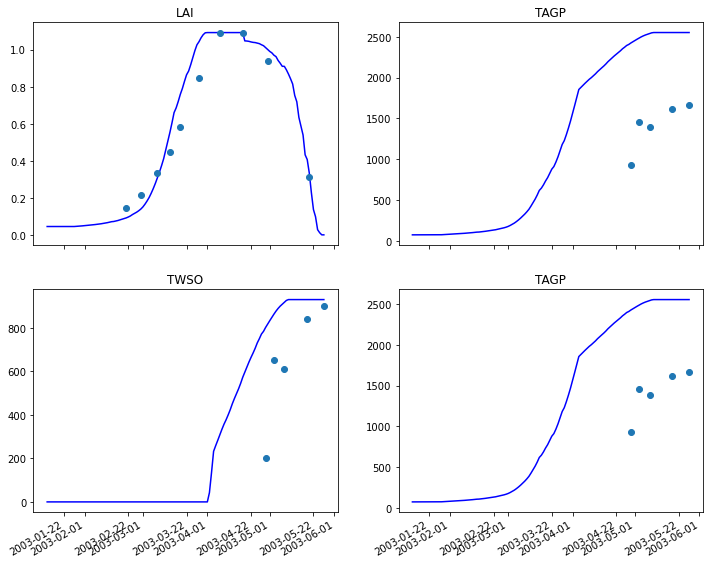

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

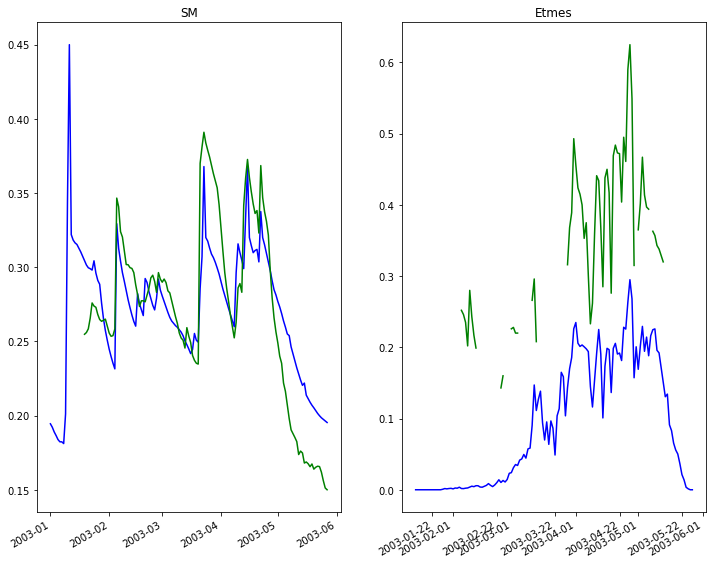

In [6]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F1-2002-2003_C3") 
result_SM = sortie_SM.set_index("day")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()